first lab simple linear regression w scitlearn

instructions:
imports



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the data

The dataset you will use resides at the following URL. You can use the URL directly with the Pandas library to load the dataset.


In [2]:
dataframe = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
dataframe.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
785,2014,MINI,COOPER COUNTRYMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
706,2014,MAZDA,MAZDA3 4-DOOR (i-ELOOP),COMPACT,2.5,4,AS6,X,8.3,6.1,7.3,39,168
568,2014,JAGUAR,XKR-S COUPE,MINICOMPACT,5.0,8,AS6,Z,15.6,10.9,13.5,21,310
61,2014,AUDI,S7,MID-SIZE,4.0,8,A7,Z,14.2,9.7,12.2,23,281
715,2014,MAZDA,MAZDA6,MID-SIZE,2.5,4,AS6,X,8.8,6.2,7.6,37,175


explore the data

In [ ]:
dataframe.describe() # gives count mean std min max and qurtiles only on numeric data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select a few features that might be indicative of CO2 emission to explore more.

In [13]:
# singl ebrackets for series double to return dataframe
C02_data = dataframe[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# making an extra var for visulisation allows for reorder of the columns
Co2_visulisation = dataframe[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

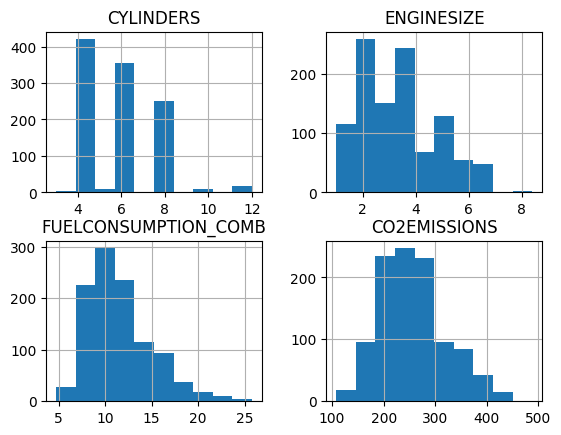

In [ ]:
# count-histogramm for overview
Co2_visulisation.hist()

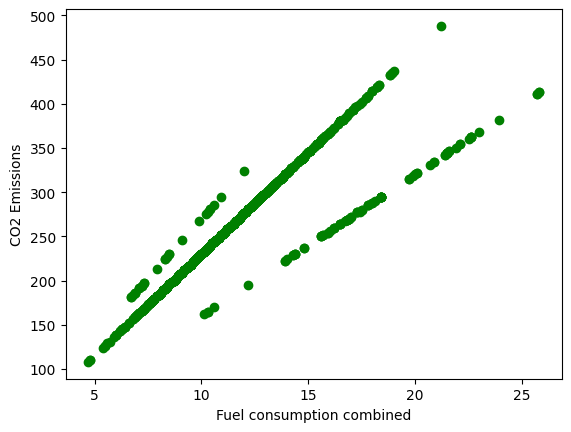

In [ ]:
# plotting linear relation between the features to co2 emission
plt.scatter(C02_data.FUELCONSUMPTION_COMB, C02_data.CO2EMISSIONS, color= 'green')
plt.xlabel("Fuel consumption combined")
plt.ylabel("CO2 Emissions")
plt.show() # not necessary for notebooks but in scripts so usually good practice, also omits the object infos printed above the plot

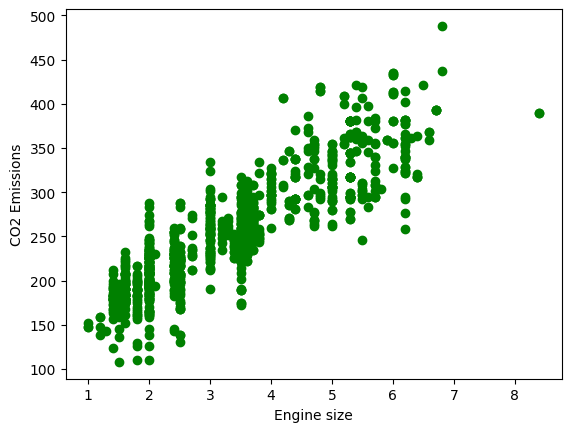

In [ ]:
plt.scatter(C02_data.ENGINESIZE, C02_data.CO2EMISSIONS, color= 'green')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
# plt.xlim(0,27) # limits the x-axis to the same size as the plot above, this also makes this less informative and there is no sense since they show very different parameters
plt.show()

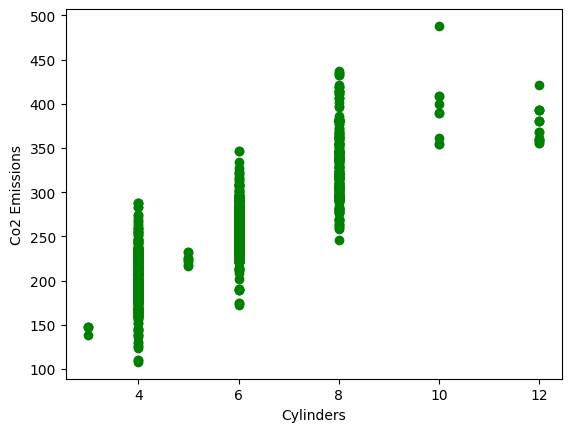

In [12]:
plt.scatter(C02_data.CYLINDERS, C02_data.CO2EMISSIONS, color='green')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emissions')
plt.show()

Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.

In [14]:
engine_array = C02_data.ENGINESIZE.to_numpy()
Co2_array = C02_data.CO2EMISSIONS.to_numpy()
exhaust_array = C02_data.FUELCONSUMPTION_COMB.to_numpy()
cylinder_array = C02_data.CYLINDERS.to_numpy()



Create train and test datasets¶

Next, you will split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.   

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.   
<br>
Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

In [ ]:
from sklearn.model_selection import train_test_split
engine_train, engine_test, co2_train, co2_test = train_test_split(engine_array,Co2_array,test_size=0.2,random_state=42)
# random state ensures that if the line is excecuted again the same split occurs, prevents data leakage 42 is convention

In [29]:
from sklearn.model_selection import train_test_split
exhaust_train, exhaust_test, co2_train2, co2_test2 = train_test_split(exhaust_array,Co2_array,test_size=0.2,random_state=42)
# random state ensures that if the line is excecuted again the same split occurs, prevents data leakage 42 is convention

In [30]:
from sklearn.model_selection import train_test_split
cylinder_train, cylinder_test, co2_train3, co2_test = train_test_split(cylinder_array,Co2_array,test_size=0.2,random_state=42)
# random state ensures that if the line is excecuted again the same split occurs, prevents data leakage 42 is convention

In [ ]:
print(co2_train[0:10], co2_train2[0:10], co2_train3[0:10], sep='\n')
# checking that the dependent var is split up the same everytime

[179 292 267 262 380 338 253 235 322 290]
[179 292 267 262 380 338 253 235 322 290]
[179 292 267 262 380 338 253 235 322 290]


In [ ]:
type(engine_train), np.shape(engine_train),
# type is numparray; shape shows example datapoint

(numpy.ndarray, (853,), (853,))

Build a simple linear regression model

You'll use scikit-learn to build your model as follows. See Scikit-Learn Linear Regression documentation to learn all about the linear model predictor object.
Here, Coefficient and Intercept are the regression parameters determined by the model.
They define the slope and intercept of the 'best-fit' line to the training data. 

In [36]:
from sklearn import linear_model

# create a model object
reg_engine = linear_model.LinearRegression()
# train the model on the data
# the model expects for target(co2) to be 1D Array ie a list and for the features a 2d Array
reg_engine.fit(engine_train.reshape(-1,1), co2_train)

reg_exhaust = linear_model.LinearRegression()
reg_exhaust.fit(exhaust_train.reshape(-1,1), co2_train)

reg_cylinder = linear_model.LinearRegression()
reg_cylinder.fit(cylinder_train.reshape(-1,1), co2_train)

print("Engine")
print('coeffcients:', reg_engine.coef_[0])
print('intercept: ', reg_engine.intercept_)

print("Exhaust")
print('coeffcients:', reg_exhaust.coef_[0])
print('intercept: ', reg_exhaust.intercept_)

print("Cylinder")
print('coeffcients:', reg_cylinder.coef_[0])
print('intercept: ', reg_cylinder.intercept_)

mixed_train = np.stack((engine_train, exhaust_train, cylinder_train), axis=1)
reg_mixed = linear_model.LinearRegression()
reg_mixed.fit(mixed_train, co2_train)

print("mixed")
print('coeffcients:', reg_mixed.coef_[0])
print('intercept: ', reg_mixed.intercept_)

Engine
coeffcients: 38.992978724434074
intercept:  126.28970217408721
Exhaust
coeffcients: 16.18090078119919
intercept:  69.10302617988452
Cylinder
coeffcients: 29.478398786995296
intercept:  86.088500361093
mixed
coeffcients: 11.209439495558229
intercept:  67.34838518362076


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.


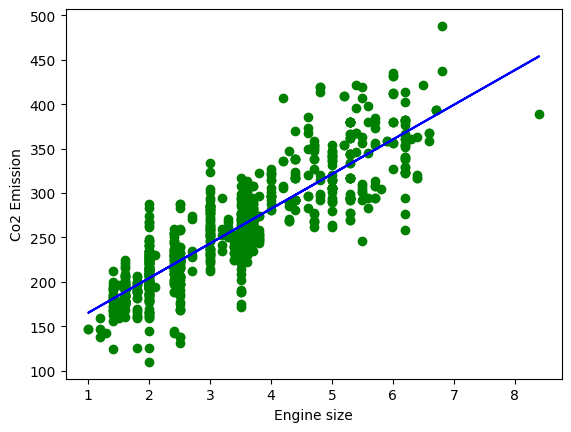

In [39]:
plt.scatter(engine_train, co2_train,  color='green')
plt.plot(engine_train, reg_engine.coef_ * engine_train + reg_engine.intercept_, '-b')
plt.xlabel("Engine size")
plt.ylabel("Co2 Emission")
plt.show()

In [ ]:
plt.scatter(exhaust_train, co2_train,  color='green')
plt.plot(exhaust_train, reg_exhaust.coef_ * exhaust_train + reg_exhaust.intercept_, '-b')
plt.xlabel("Exhaust")
plt.ylabel("Co2 Emission")
plt.show()

In [ ]:
plt.scatter(cylinder_train, co2_train,  color='green')
plt.plot(cylinder_train, reg_cylinder.coef_ * cylinder_train + reg_cylinder.intercept_, '-b')
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emission")
plt.show()

In [ ]:
plt.scatter(cylinder_train, co2_train,  color='green')
plt.plot(mixed_train, reg_mixed.coef_ * mixed_train + reg_mixed.intercept_, '-b')
plt.xlabel("mixed feats")
plt.ylabel("Co2 Emission")
plt.show()

engine size seems to be the best fit , cylinder being categorical isnt real ly sensable to fit and fitting to mixed doesnt make sense since

Model evaluation

You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:

    Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

    Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

    Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

    R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# engine_train, engine_test, co2_train, co2_test = train_test_split(engine_array,Co2_array,test_size=0.2,random_state=42)
learned_engine = reg_engine.predict(engine_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(learned_engine, co2_test))
# 24.10 is how far the predictions are off compared to the test data on average
print("Mean squared error: %.2f" % mean_squared_error(learned_engine, co2_test))
# 985.94 squared errors so larger mistakes count more
print("Root mean squared error: %.2f" % root_mean_squared_error(learned_engine, co2_test))
# 31.40 same unit as co2 emissions(target) still emphasises bigger errors
print("R2-score: %.2f" % r2_score( learned_engine, co2_test) )
# 0.68 tells how well the mod3el explains the variance 1 perfect, 0 basically guessing

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


 Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good

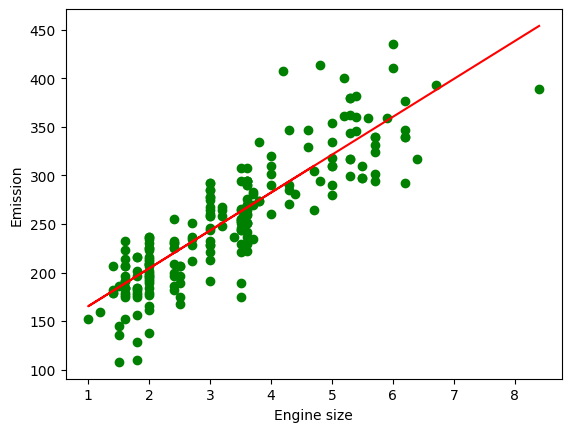

In [49]:
plt.scatter(engine_test, co2_test,  color='green')
plt.plot(engine_test, reg_engine.coef_ * engine_test + reg_engine.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Let's see the evaluation metrics if you train a regression model using the FUELCONSUMPTION_COMB feature.